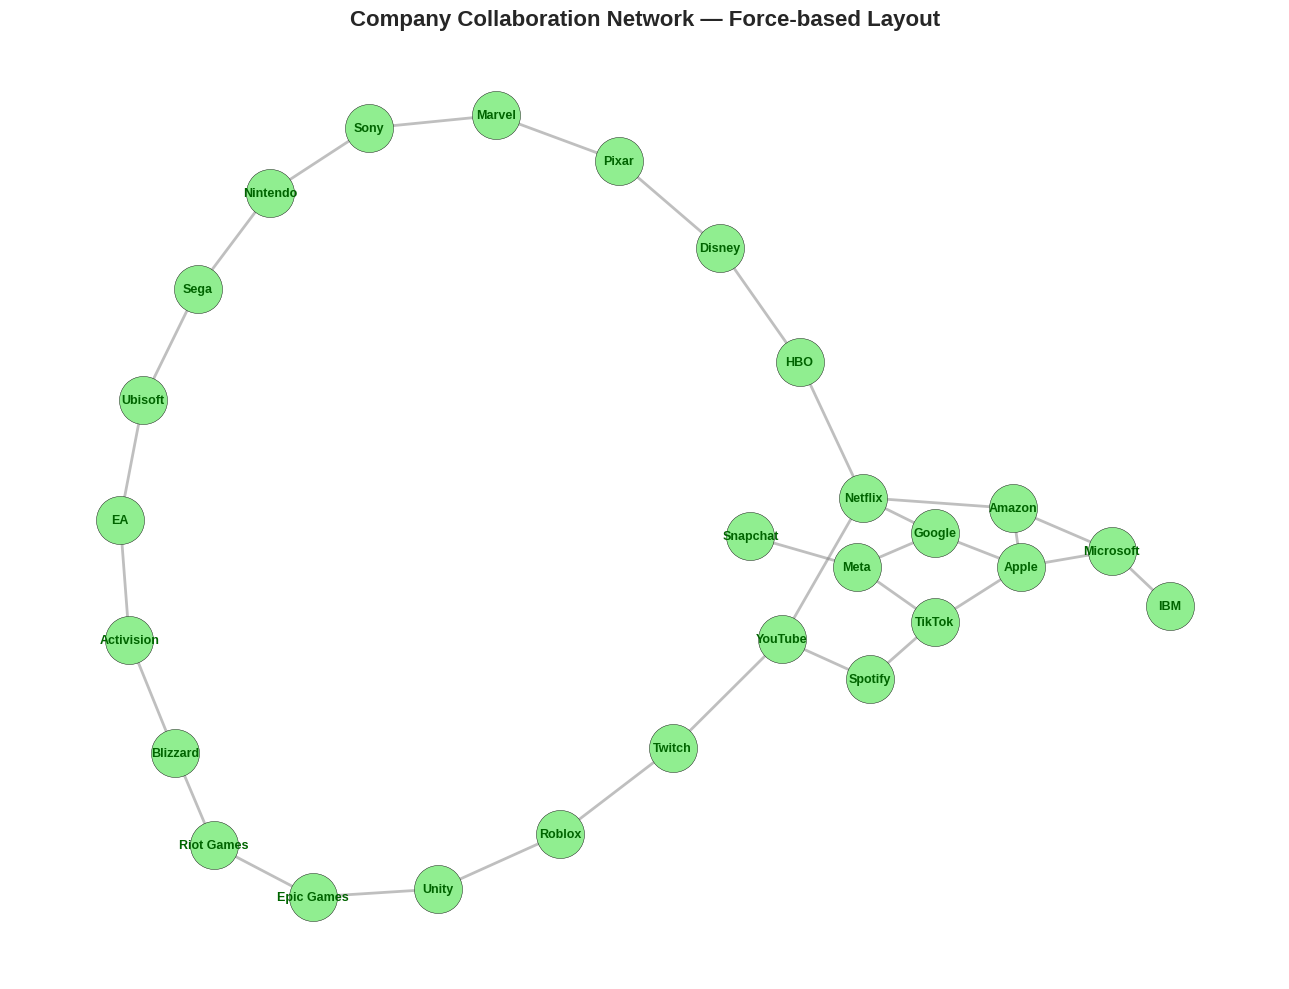

In [ ]:
# ==============================
# Enhanced Force-based Layout Visualization (Company Collaboration Network)
# ==============================

import networkx as nx
import matplotlib.pyplot as plt

# ---- Step 1: Create Sample Collaboration Edges ----
edges = [
    ("Apple", "Microsoft"), ("Apple", "Google"), ("Apple", "Amazon"),
    ("Google", "Meta"), ("Microsoft", "IBM"), ("Amazon", "Netflix"),
    ("Meta", "Snapchat"), ("Netflix", "HBO"), ("HBO", "Disney"),
    ("Disney", "Pixar"), ("Pixar", "Marvel"), ("Marvel", "Sony"),
    ("Sony", "Nintendo"), ("Nintendo", "Sega"), ("Sega", "Ubisoft"),
    ("Ubisoft", "EA"), ("EA", "Activision"), ("Activision", "Blizzard"),
    ("Blizzard", "Riot Games"), ("Riot Games", "Epic Games"),
    ("Epic Games", "Unity"), ("Unity", "Roblox"), ("Roblox", "Twitch"),
    ("Twitch", "YouTube"), ("YouTube", "Spotify"), ("Spotify", "TikTok"),
    ("TikTok", "Apple"), ("Netflix", "YouTube"), ("Meta", "TikTok"),
    ("Microsoft", "Amazon"), ("Google", "Netflix")
]

# ---- Step 2: Create Graph ----
G = nx.Graph()
G.add_edges_from(edges)

# ---- Step 3: Compute Force-based Layout ----
pos = nx.spring_layout(G, seed=24, k=0.45, iterations=120)

# ---- Step 4: Visualize ----
plt.figure(figsize=(13, 10))
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightgreen', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', font_color='darkgreen')

plt.title("Company Collaboration Network — Force-based Layout", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


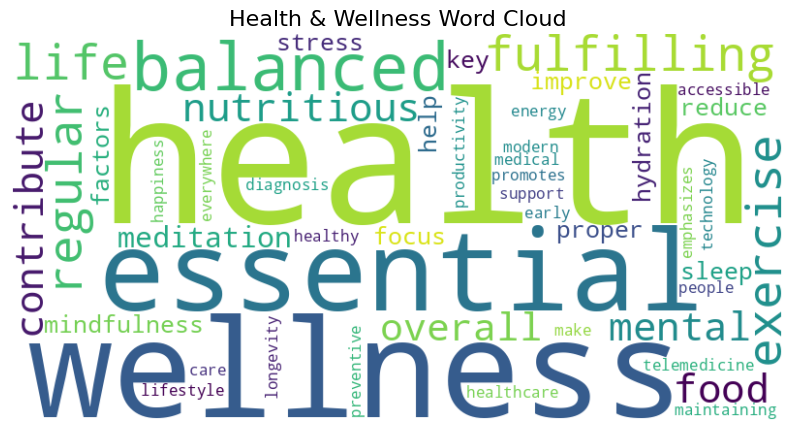

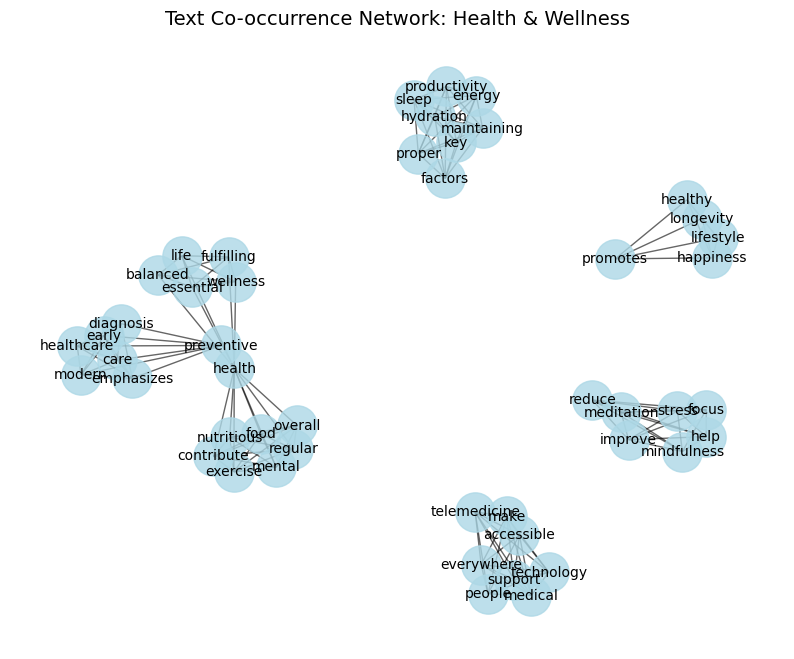

Top 5 most central words:
health: 0.255
regular: 0.149
exercise: 0.149
nutritious: 0.149
food: 0.149


In [ ]:
# ---- Step 0: Install Required Libraries (if needed) ----
# !pip install nltk wordcloud matplotlib networkx

# ---- Step 1: Import Libraries ----
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk

# ---- Step 2: Download NLTK Data ----
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to fix the LookupError


# ---- Step 3: Input Text ----
text = """
Health and wellness are essential for a balanced and fulfilling life.
Regular exercise, nutritious food, and mental well-being contribute to overall health.
Meditation and mindfulness help reduce stress and improve focus.
Proper sleep and hydration are key factors for maintaining energy and productivity.
Modern healthcare emphasizes preventive care and early diagnosis.
Technology and telemedicine make medical support accessible to people everywhere.
A healthy lifestyle promotes longevity and happiness.
"""

# ---- Step 4: Preprocess Text ----
stop_words = set(stopwords.words('english'))

# Tokenize sentences and words
sentences = sent_tokenize(text.lower())
tokenized_sentences = [
    [word for word in word_tokenize(sent) if word.isalpha() and word not in stop_words]
    for sent in sentences
]

# Flatten tokens for WordCloud
all_words = [word for sent in tokenized_sentences for word in sent]

# ---- Step 5: Create WordCloud ----
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(' '.join(all_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Health & Wellness Word Cloud", fontsize=16)
plt.show()

# ---- Step 6: Build Co-occurrence Network ----
G = nx.Graph()

for sent in tokenized_sentences:
    for i in range(len(sent)):
        for j in range(i + 1, len(sent)):
            w1, w2 = sent[i], sent[j]
            if G.has_edge(w1, w2):
                G[w1][w2]['weight'] += 1
            else:
                G.add_edge(w1, w2, weight=1)

# ---- Step 7: Visualize Network ----
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Text Co-occurrence Network: Health & Wellness", fontsize=14)
plt.axis('off')
plt.show()

# ---- Step 8: Analyze Network ----
degree_centrality = nx.degree_centrality(G)
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Top 5 most central words:")
for word, score in sorted_centrality[:5]:
    print(f"{word}: {score:.3f}")

# Step 1: Recreate the dataset (if not uploaded)
import pandas as pd
import numpy as np
import random

routes = [f"Route_{i}" for i in range(1, 11)]
ticket_types = ['Single', 'Daily', 'Weekly', 'Monthly']
route_types = ['Bus', 'Metro', 'Tram']
day_types = ['Weekday', 'Weekend']
hours = list(range(5, 24))
weather_types = ['Sunny', 'Rainy', 'Cloudy']

data = []
for _ in range(200):
    route = random.choice(routes)
    route_type = random.choice(route_types)
    ticket = random.choice(ticket_types)
    hour = random.choice(hours)
    base = 200
    if route_type == 'Metro': base += 300
    elif route_type == 'Bus': base += 150
    if ticket in ['Weekly','Monthly']: base += 100
    if 7 <= hour <= 9 or 17 <= hour <= 20: base += 250
    day_type = random.choice(day_types)
    if day_type == 'Weekend': base -= 100
    ridership = int(np.random.normal(base, 50))
    weather = random.choice(weather_types)
    traffic = random.randint(1,5)
    data.append([route, route_type, ticket, hour, ridership, weather, traffic, day_type])

df = pd.DataFrame(data, columns=['Route','RouteType','TicketType','Hour','Ridership','Weather','Traffic','DayType'])
df['Month'] = np.random.choice(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'], 200)
df['Feedback'] = np.random.choice(['Late bus','Crowded station','Good service','Clean train','Noisy ride','Helpful staff','Ticket issue','Delay problem'], 200)

# Step 2: Save to Excel
df.to_excel('public_transport_200.xlsx', index=False)

# Step 3: Download to your local system
from google.colab import files
files.download('public_transport_200.xlsx')

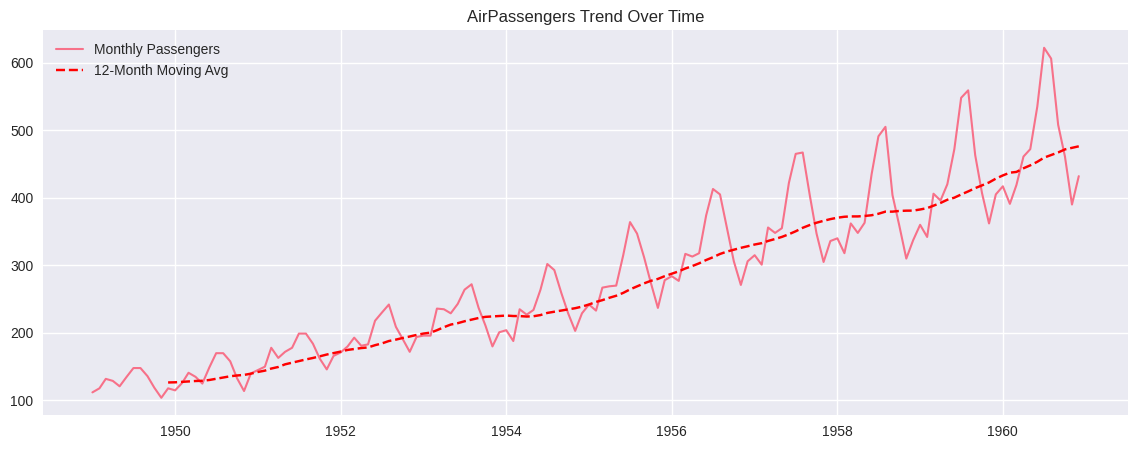

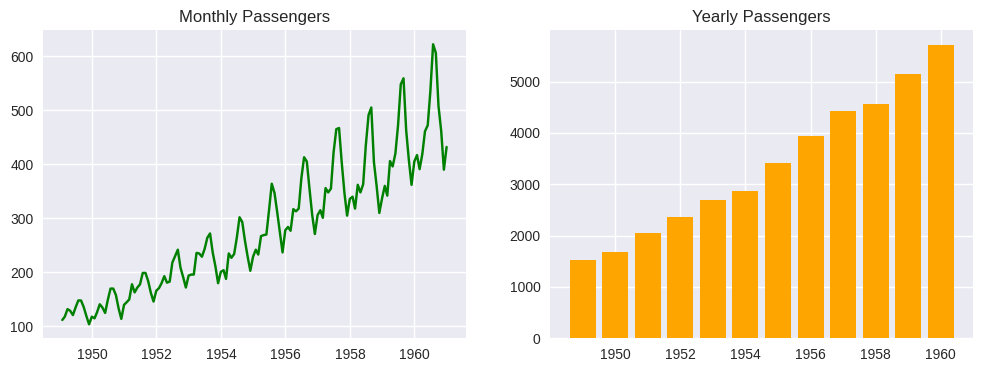

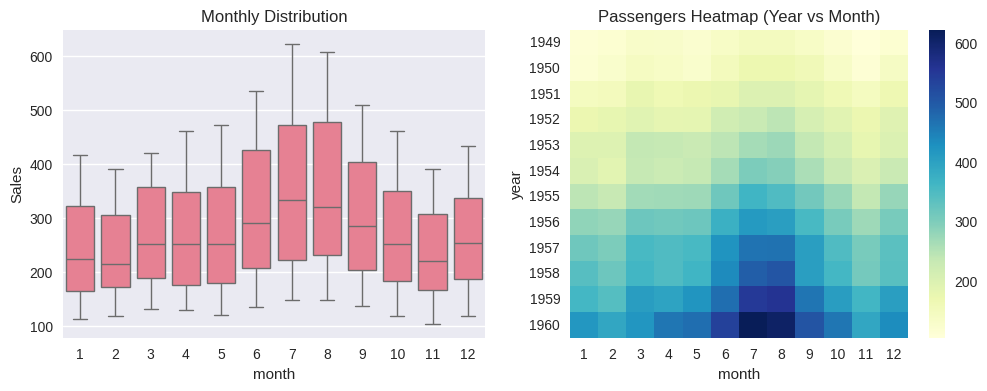

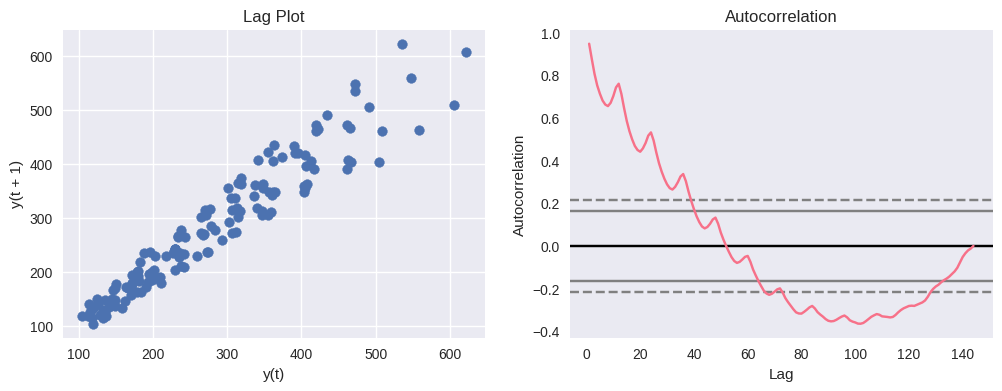

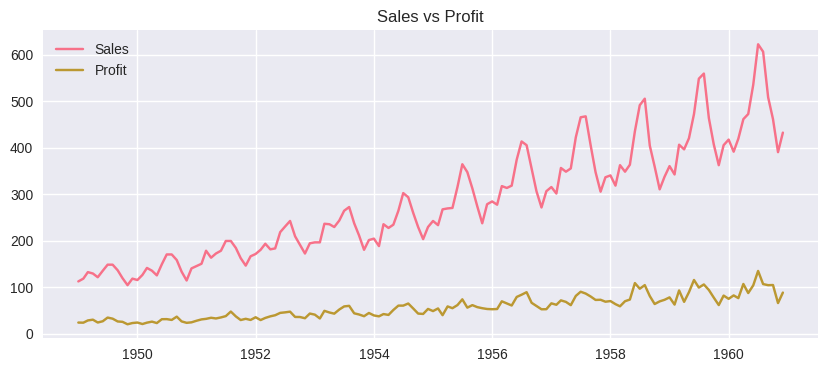

In [ ]:
# ==========================
# TASK-9: Time Series Analysis (AirPassengers Dataset)
# ==========================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8'); sns.set_palette("husl")

# 1️⃣ Load and Prepare Data
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.rename(columns={'Month': 'Date', 'Passengers': 'Sales'}, inplace=True)
df.set_index('Date', inplace=True)
df['year'], df['month'], df['quarter'] = df.index.year, df.index.month, df.index.quarter

# 2️⃣ Trend Analysis
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Sales'], label='Monthly Passengers', linewidth=1.5)
plt.plot(df['Sales'].rolling(12).mean(), 'r--', label='12-Month Moving Avg')
plt.title('AirPassengers Trend Over Time'); plt.legend(); plt.show()

# 3️⃣ Monthly & Yearly Overview
monthly = df['Sales'].resample('M').sum()
yearly = df['Sales'].resample('Y').sum()
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(monthly.index, monthly.values, color='green'); ax[0].set_title('Monthly Passengers')
ax[1].bar(yearly.index.year, yearly.values, color='orange'); ax[1].set_title('Yearly Passengers')
plt.show()

# 4️⃣ Seasonality & Distribution
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x='month', y='Sales', data=df, ax=ax[0]); ax[0].set_title('Monthly Distribution')
sns.heatmap(df.groupby(['year','month'])['Sales'].sum().unstack(), cmap='YlGnBu', ax=ax[1])
ax[1].set_title('Passengers Heatmap (Year vs Month)'); plt.show()

# 5️⃣ Lag & Autocorrelation
fig, ax = plt.subplots(1,2, figsize=(12,4))
lag_plot(df['Sales'], ax=ax[0]); autocorrelation_plot(df['Sales'], ax=ax[1])
ax[0].set_title('Lag Plot'); ax[1].set_title('Autocorrelation'); plt.show()

# 6️⃣ Profit Analysis (Simulated)
np.random.seed(42)
df['profit'] = df['Sales'] * 0.2 * (1 + np.random.normal(0, 0.1, len(df)))
df['profit_margin'] = df['profit'] / df['Sales']
plt.figure(figsize=(10,4))
plt.plot(df['Sales'], label='Sales'); plt.plot(df['profit'], label='Profit')
plt.title('Sales vs Profit'); plt.legend(); plt.show()


Data Loaded: (50, 17)


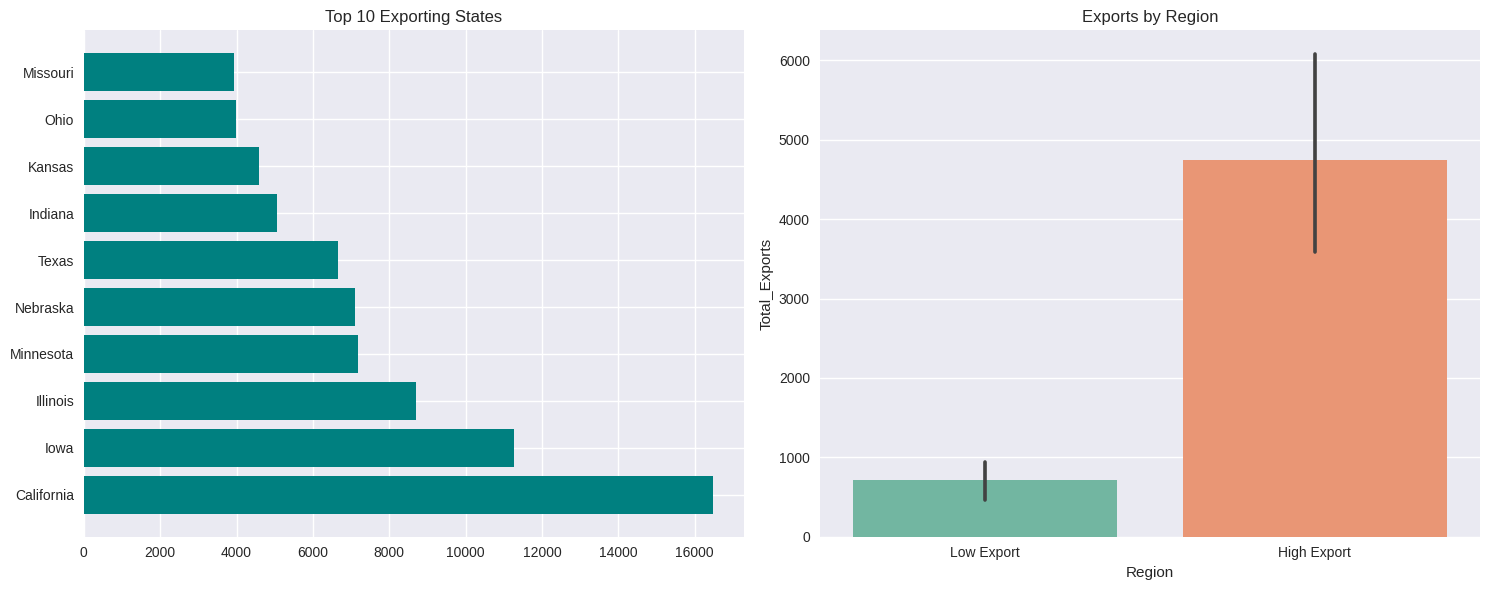

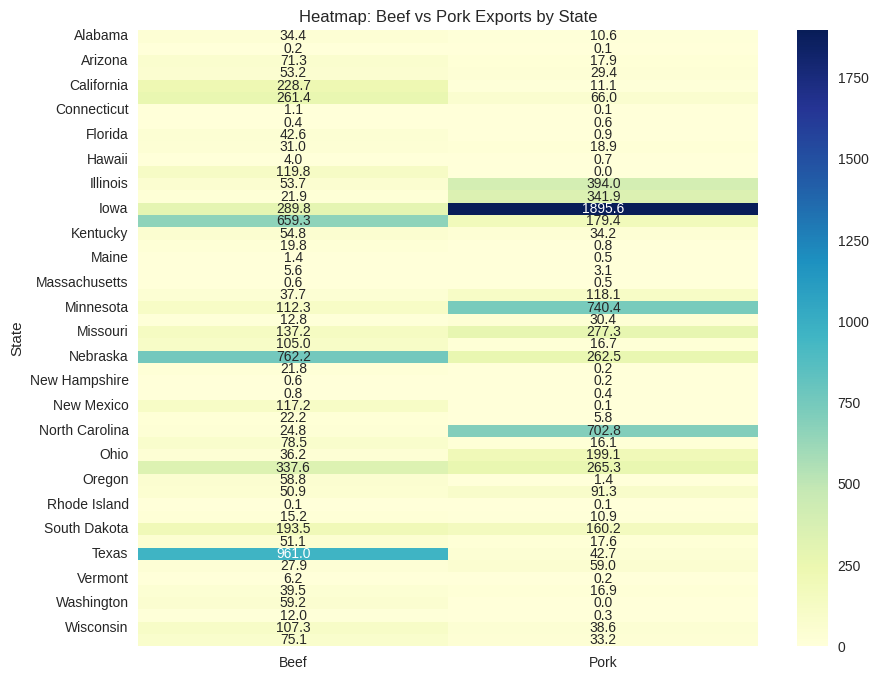


--- SUMMARY ---
Total States: 50, Total Exports: $136,444.45M
Top 5 States:
          State  Total_Exports
4   California       16472.88
14        Iowa       11273.76
12    Illinois        8709.48
22   Minnesota        7192.33
26    Nebraska        7114.13
Average Beef & Pork Exports:
 Beef    108.39
Pork    122.28
dtype: float64


In [ ]:
# ===============================
# TASK-8: Spatial & Geospatial Data Visualization (US State Population & GDP)
# ===============================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, geopandas as gpd, folium, plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# -------------------------------
# 1. Load & Prepare Data
# -------------------------------
# Using Plotly's built-in dataset of US states with population & GDP
url = "https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv"
df = pd.read_csv(url)
df = df.rename(columns={'state': 'State', 'total exports': 'Total_Exports', 'beef': 'Beef', 'pork': 'Pork'})

print("Data Loaded:", df.shape)
df.head()

# -------------------------------
# 2. Aggregate (optional)
# -------------------------------
# No aggregation needed since each row represents one state.
df['Region'] = np.where(df['Total_Exports'] > df['Total_Exports'].median(), 'High Export', 'Low Export')

# -------------------------------
# 3. Plotly Choropleth (Exports by State)
# -------------------------------
fig = px.choropleth(df, locations='code', locationmode='USA-states',
                    color='Total_Exports', scope='usa', color_continuous_scale='Viridis',
                    title='US Exports by State (2011)', hover_name='State')
fig.update_layout(title_x=0.5)
fig.show()

# -------------------------------
# 4. Basic Visuals (Top States & Regions)
# -------------------------------
top = df.nlargest(10, 'Total_Exports')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].barh(top['State'], top['Total_Exports'], color='teal')
ax[0].set_title('Top 10 Exporting States')
sns.barplot(x='Region', y='Total_Exports', data=df, ax=ax[1], palette='Set2')
ax[1].set_title('Exports by Region')
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Folium Interactive Map
# -------------------------------
# Add simple lat/lon mapping using sample coordinates (approx centers)
coords = {
    'California':[36.7,-119.4],'Texas':[31.9,-99.9],'New York':[40.7,-74.0],
    'Florida':[27.7,-81.5],'Illinois':[40.6,-89.4],'Washington':[47.4,-120.7],
    'Georgia':[33.0,-83.5],'Michigan':[43.0,-84.5],'Ohio':[40.4,-82.9],'North Carolina':[35.5,-79.0]
}

m = folium.Map(location=[39.8,-98.6], zoom_start=4, tiles='CartoDB positron')
for _, row in df.iterrows():
    if row['State'] in coords:
        lat, lon = coords[row['State']]
        folium.CircleMarker(
            [lat, lon],
            radius=np.log(row['Total_Exports'])*2,
            color='blue', fill=True,
            tooltip=f"{row['State']}: ${row['Total_Exports']:.0f}M"
        ).add_to(m)
m.save("us_exports_map.html")

# -------------------------------
# 6. Heatmap: State vs Export Type
# -------------------------------
pivot = df[['State', 'Beef', 'Pork']].set_index('State')
plt.figure(figsize=(10,8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title("Heatmap: Beef vs Pork Exports by State")
plt.show()

# -------------------------------
# 7. Summary Insights
# -------------------------------
print("\n--- SUMMARY ---")
print(f"Total States: {len(df)}, Total Exports: ${df['Total_Exports'].sum():,.2f}M")
print("Top 5 States:\n", df.nlargest(5, 'Total_Exports')[['State','Total_Exports']])
print("Average Beef & Pork Exports:\n", df[['Beef','Pork']].mean().round(2))


In [4]:
# ✅ STEP 1: Install openpyxl (for Excel support)
!pip install openpyxl

# ✅ STEP 2: Generate the dataset
import pandas as pd
import numpy as np
import random

routes = [f"Route_{i}" for i in range(1, 11)]
ticket_types = ['Single', 'Daily', 'Weekly', 'Monthly']
route_types = ['Bus', 'Metro', 'Tram']
day_types = ['Weekday', 'Weekend']
hours = list(range(5, 24))
weather_types = ['Sunny', 'Rainy', 'Cloudy']

data = []
for _ in range(200):
    route = random.choice(routes)
    route_type = random.choice(route_types)
    ticket = random.choice(ticket_types)
    hour = random.choice(hours)
    base = 200
    if route_type == 'Metro': base += 300
    elif route_type == 'Bus': base += 150
    if ticket in ['Weekly','Monthly']: base += 100
    if 7 <= hour <= 9 or 17 <= hour <= 20: base += 250
    day_type = random.choice(day_types)
    if day_type == 'Weekend': base -= 100
    ridership = int(np.random.normal(base, 50))
    weather = random.choice(weather_types)
    traffic = random.randint(1,5)
    data.append([route, route_type, ticket, hour, ridership, weather, traffic, day_type])

df = pd.DataFrame(data, columns=['Route','RouteType','TicketType','Hour','Ridership','Weather','Traffic','DayType'])
df['Month'] = np.random.choice(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'], 200)
df['Feedback'] = np.random.choice(['Late bus','Crowded station','Good service','Clean train','Noisy ride','Helpful staff','Ticket issue','Delay problem'], 200)

# ✅ STEP 3: Save to Excel file
df.to_excel('public_transport_200.xlsx', index=False)

# ✅ STEP 4: Download to your computer
from google.colab import files
files.download('public_transport_200.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>